This notebook focuses on analysing the Seattle AirBnB dataset available from [Kaggle](https://www.kaggle.com/airbnb/seattle/data). This notebook was done as a project for the Data Scientist Nanodegree program on Udacity.

# Package import ad paths setup

!pip install missingno

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import missingno

In [2]:
%matplotlib inline

In [3]:
DATA_FOLDER = Path('../data')

In [4]:
!ls $DATA_FOLDER

calendar.csv
listings.csv
reviews.csv


In [5]:
calendar = pd.read_csv(DATA_FOLDER / 'calendar.csv')
listings = pd.read_csv(DATA_FOLDER / 'listings.csv')
reviews = pd.read_csv(DATA_FOLDER / 'reviews.csv')

# Data quality

In this first section we will look into the quality of the data. Specifically we will look at missing values in the data. I like to use the package [missingno](https://github.com/ResidentMario/missingno), which gives a good overview of columns and where there are missing values.

## Calendar data

In [6]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


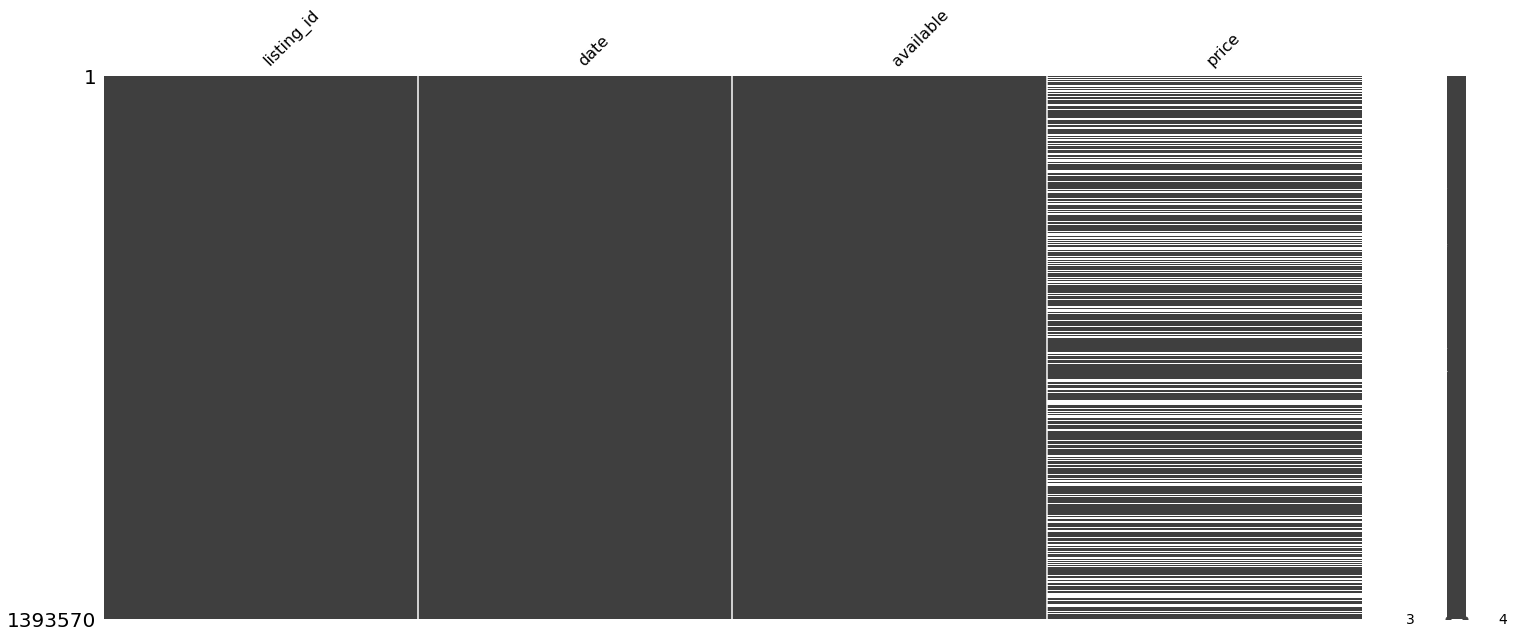

In [7]:
missingno.matrix(calendar);

This data shows what prices listings have had at a given time. Also it shows if the listing has been rented out or not.

Apparent from above is that the price column often has null values. Seing as the data lists prices and availability given a certain date, it is possible that this is a natural thing, since listings will be shown without prices, whenever they are rented out to visitors. This will be investigated further in the analysis section of this notebook.

### Cleaning

In [12]:
calendar['date'] = pd.to_datetime(calendar['date'])

## Listings data

In [8]:
listings.head().T

,0,1,2,3,4
id,241032,953595,3308979,7421966,278830
listing_url,https://www.airbnb.com/rooms/241032,https://www.airbnb.com/rooms/953595,https://www.airbnb.com/rooms/3308979,https://www.airbnb.com/rooms/7421966,https://www.airbnb.com/rooms/278830
scrape_id,20160104002432,20160104002432,20160104002432,20160104002432,20160104002432
last_scraped,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04
name,Stylish Queen Anne Apartment,Bright & Airy Queen Anne Apartment,New Modern House-Amazing water view,Queen Anne Chateau,Charming craftsman 3 bdm house
...,...,...,...,...,...
cancellation_policy,moderate,strict,strict,flexible,strict
require_guest_profile_picture,f,t,f,f,f
require_guest_phone_verification,f,t,f,f,f
calculated_host_listings_count,2,6,2,1,1


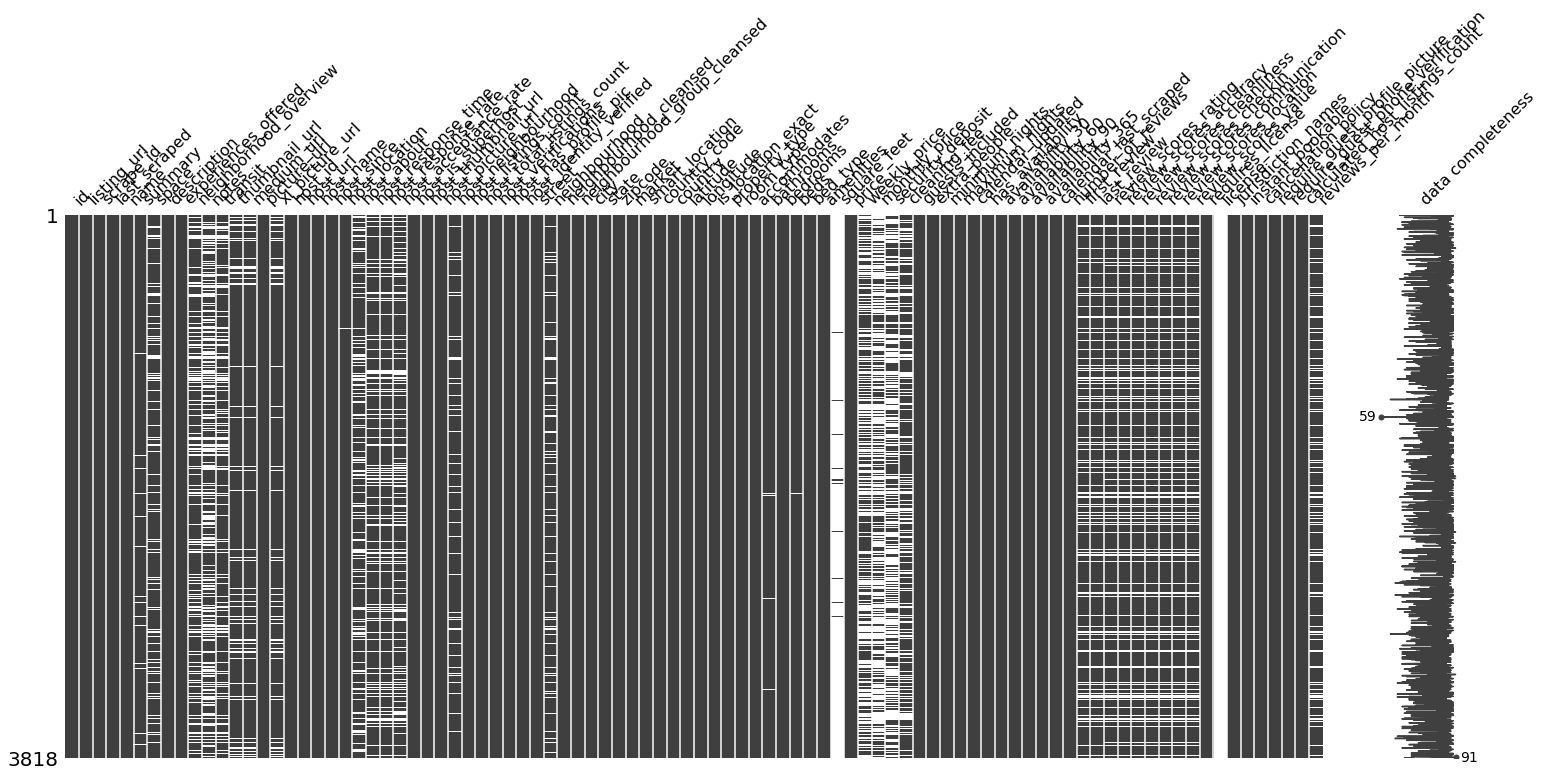

In [9]:
missingno.matrix(listings, labels=True);

This data describes each of the listings on AirBnB. This data has a total of 91 columns and a lot of them are missing values at various places. The row with minium missing values still has 59 values missing, and the row with the maximum values missing has 91 values missing. There are good reasons for listing data to have missing values since listings are of various types, also the owner might not have completed the many ways in which there is to describe the listing.

## Reviews

In [10]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


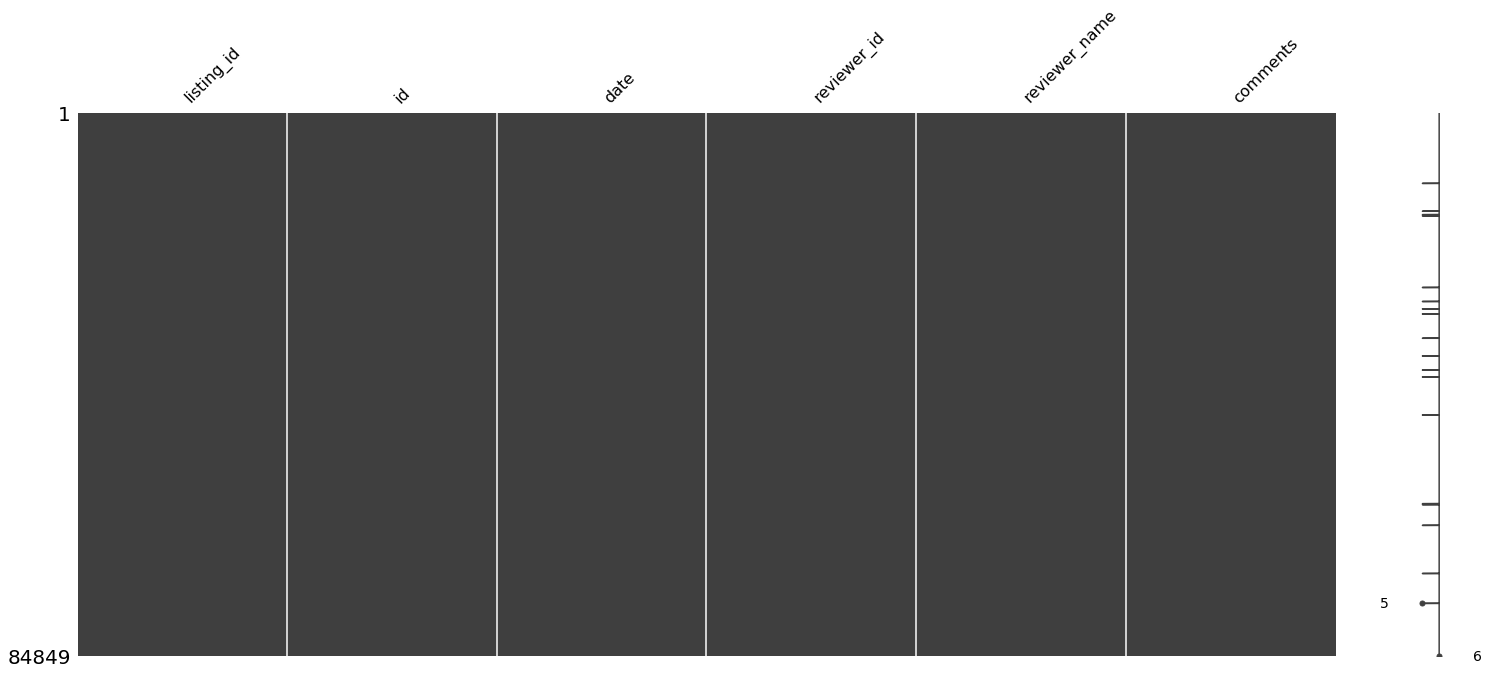

In [11]:
missingno.matrix(reviews)

This data shows the visitors reviews in text for a given listing, at a given date. Remarkably there are very few missing values.

# Analysis

In [13]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [14]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


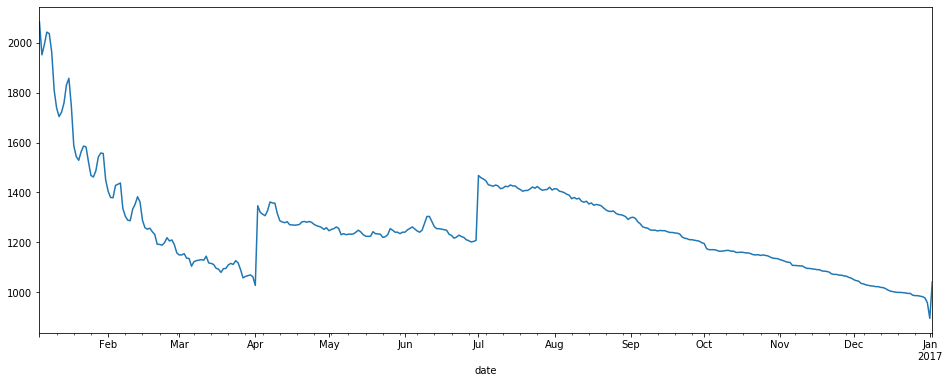

In [21]:
fig,ax = plt.subplots(figsize=(16,6))
calendar[calendar['available'] == 'f'].groupby('date').size().plot(ax=ax);